In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
# print(plt.style.available)  # show available template
plt.style.use(['seaborn-ticks','seaborn-paper'])  # use a templet

import matplotlib as mpl
# mpl.rcParams['lines.linewidth'] = 2
# mpl.rcParams['lines.color'] = 'r'
params = {
    'figure.figsize': [8, 6], # Note! figure unit is inch!  scale fontz size 2.54 to looks like unit cm
    'axes.labelsize': 7*2.54, # scale 2.54 to change to figure unit looks as cm
    'font.size':  7*2.54,
    'lines.linewidth':2,
    'legend.fontsize': 7*2.54,
    'xtick.labelsize': 7*2.54,
    'ytick.labelsize': 7*2.54,
    'text.usetex': False,  
    'xtick.direction': "in",
    'ytick.direction': "in", # ticket inside
    'legend.frameon' : True, 
    'legend.edgecolor': 'black',
    'legend.shadow': True,
    'legend.framealpha':1,
#     'patch.linewidth' : 0.5, 
}
mpl.rcParams.update(params)

In [9]:
from sympy import *
init_printing()
from scipy.constants import c as c0
from scipy.constants import m_p
from scipy.constants import hbar as h
import numpy as np

m,c,omega0,Gamma,Delta,delta, Is, If, w0, hbar, wavelen, w, Pf, Ps = symbols('m, c, \omega_0, \Gamma,\Delta,\delta, I_s, I_f , \sigma,\hbar,\lambda,w,P_f,P_s ')
# omega0, 共振角频率
# w0     激光的半峰宽

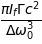

In [10]:
# foucs 场，提供局域tailor 势能
U_dip_f = pi*c**2*Gamma*If/(omega0**3*Delta)
U_dip_f 

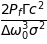

In [11]:
I_f = 2*Pf/(pi*w0**2)
U_f = U_dip_f.subs({If:I_f})
U_f

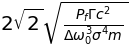

In [12]:
W_f = sqrt(4*U_f/(m*w0**2))
W_f

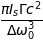

In [13]:
# standing wave 场，用于提供spin-dependent force
U_dip_s = pi*c**2*Gamma*Is/(omega0**3*Delta)
U_dip_s 

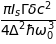

In [14]:
Omega_dip_s = pi*c**2*Gamma*Is*delta/(4*omega0**3*Delta**2*hbar)
Omega_dip_s

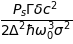

In [15]:
I_s = 2*Ps/(pi*w0**2)
U_s = U_dip_s.subs({Is:I_s})
Omega_s = Omega_dip_s.subs({Is:I_s})
Omega_s

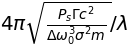

In [16]:
W_s = 2*pi/wavelen*sqrt(2*U_s/(m))
W_s

In [17]:
paras={
    Gamma: 20e6*2*pi,
    omega0: 2*pi*c/(0.369e-6),
    Delta: 2*pi*200e9,
    w0:    0.5e-6,
    m:     171*m_p,
    Pf:     1e-3,
    Ps:     1e-3,
    delta: 2*pi*12.6e9,
    c:  c0,
    wavelen: (0.369e-6),
    delta:   2*pi*12.6e9,
    hbar: h
}

Omega_S = N(Omega_s.subs(paras)/(2*pi))
print(Omega_S/1e6)

V_f = N(W_f.subs(paras)/(2*pi))
print(V_f/1e6)

w_f = N((W_f**2*m).subs(paras))

w_f/10e12/h/2/np.pi/1e9

12.8479344853350
0.875160217145379


## 计算的离子, dipole的强度为0.875 MHz, 光束的束腰半径为0.5$\ \mu$m

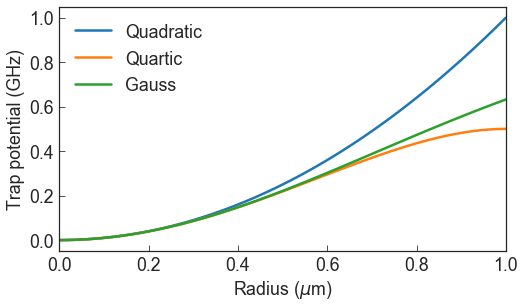

In [39]:
def f_1(x):
    return (x)**2
def f_2(x):
    return (x)**2-1/2*(x)**4
def f_3(x):
    return 1-np.exp(-(x)**2)
plt.figure(figsize=(8,4.5))
r = np.linspace(0,1,100)
plt.xlim(0,1)
plt.plot(r, f_1(r), label='Quadratic', lw=2.5)
plt.plot(r, f_2(r), label='Quartic', lw=2.5)
plt.plot(r, f_3(r), label='Gauss', lw=2.5)
plt.ylabel('Trap potential (GHz)')
plt.xlabel('Radius ('+r'$\mu$'+'m)')
plt.legend(frameon=False)
plt.savefig('../fig/ff1.pdf')

In [21]:
dis=[
0.008466329964996022,
0.023062782382126418,
0.04239740571797614,
0.06534056168347965,
0.09151997507842269,
0.12046142759728587,
0.1521087245404114,
0.1862806858102652,
0.22309742904388635,
0.2626244384546675,
0.3052656248783535,
0.3519953403682462,
0.40256450751438877,
0.4587448418053484,
0.521673331195076,
0.5932368606046045,
0.6731162023772314,
0.7609440507428165,
0.8568627524471526,
0.9547978700364435,
1.05688690125201,
1.1563424749545292,
1.2532250088100665,
1.3335449384858409,
1.428420059114951,
1.5133813699873844,
1.6257320434945406,
1.7358278427791594,
1.8130281673547546,
1.8899630461693773
]

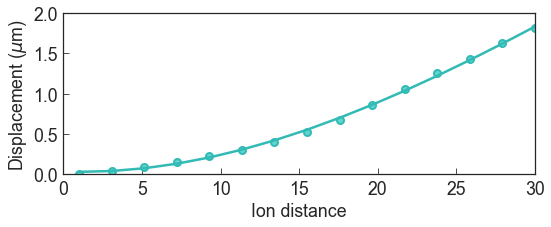

In [38]:
plt.figure(figsize=(8,3.5))
N = np.linspace(1,30,15)
plt.plot(N,dis[0:30:2], 'o',ms=7,markeredgewidth=2, markeredgecolor='#32bab5', markerfacecolor='#63d5d1')
plt.ylim(0,2)
plt.xlim(0,30)
ff = np.polyfit(N, dis[0:30:2], 3)
pf = np.poly1d(ff)
yvalsf = pf(N)
plt.plot(N,yvalsf, color ="#32bab5",lw=2.5)
plt.xlabel('Ion distance')
plt.ylabel('Displacement ('+r'$\mu$'+'m)')
plt.tight_layout()
plt.savefig('../fig/ff2.pdf')